In [8]:
import tkinter as tk
from tkinter import ttk
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
model = joblib.load("Final_Personal_Finance_Model.joblib")

In [10]:
# Simulate a basic database (in-memory dictionary)
user_data = {}


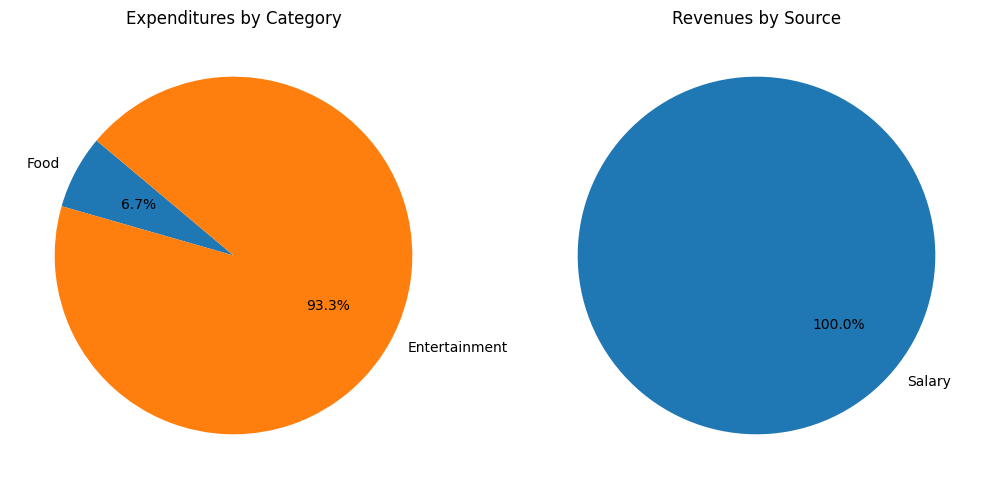

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt

# Simulated basic database (in-memory dictionary for users)
user_data = {}
# Predefined categories for expenses
expenditure_categories = ["Food", "Entertainment", "Transport", "Shopping", "Healthcare"]
# List to store income sources (start with default options)
income_sources = ['Salary', 'Other Income Source']
# Global variable to track logged-in user
logged_in_user = None
# Initialize expenditure and revenue data storage for analysis
expenditures = []
revenues = []

# Function to clear frame content
def clear_frame():
    for widget in root.winfo_children():
        widget.destroy()

# Function to create an account
def create_account_screen():
    clear_frame()
    tk.Label(root, text="Create an Account", font=("Arial", 14)).pack(pady=10)

    tk.Label(root, text="Name").pack()
    name_entry = tk.Entry(root)
    name_entry.pack()

    tk.Label(root, text="Phone Number").pack()
    phone_entry = tk.Entry(root)
    phone_entry.pack()

    tk.Label(root, text="Username").pack()
    username_entry = tk.Entry(root)
    username_entry.pack()

    tk.Label(root, text="Password").pack()
    password_entry = tk.Entry(root, show="*")
    password_entry.pack()

    def save_account():
        name = name_entry.get()
        phone = phone_entry.get()
        username = username_entry.get()
        password = password_entry.get()

        if username in user_data:
            tk.Label(root, text="Username already exists!", fg="red").pack()
        else:
            user_data[username] = {"name": name, "phone": phone, "password": password}
            tk.Label(root, text="Account created successfully!", fg="green").pack()
            show_main_screen()

    ttk.Button(root, text="Create Account", command=save_account).pack(pady=10)

# Function for login
def login_screen():
    clear_frame()
    tk.Label(root, text="Log In", font=("Arial", 14)).pack(pady=10)

    tk.Label(root, text="Username").pack()
    username_entry = tk.Entry(root)
    username_entry.pack()

    tk.Label(root, text="Password").pack()
    password_entry = tk.Entry(root, show="*")
    password_entry.pack()

    def verify_login():
        global logged_in_user
        username = username_entry.get()
        password = password_entry.get()

        if username in user_data and user_data[username]["password"] == password:
            logged_in_user = username
            dashboard()
        else:
            tk.Label(root, text="Invalid credentials, please try again.", fg="red").pack()

    ttk.Button(root, text="Log In", command=verify_login).pack(pady=10)

# Function to handle adding expenditure
def add_expenditure_screen():
    exp_window = tk.Toplevel(root)
    exp_window.title("Add Expenditure")

    tk.Label(exp_window, text="Enter Amount:").pack()
    amount_entry = tk.Entry(exp_window)
    amount_entry.pack()

    tk.Label(exp_window, text="Select Category:").pack()
    category_var = tk.StringVar(exp_window)
    category_var.set(expenditure_categories[0])
    category_dropdown = tk.OptionMenu(exp_window, category_var, *expenditure_categories)
    category_dropdown.pack()

    tk.Label(exp_window, text="Select Payment Method:").pack()
    payment_var = tk.StringVar(exp_window)
    payment_var.set("Credit")
    payment_methods = ['Credit', 'Debit', 'Cash']
    payment_dropdown = tk.OptionMenu(exp_window, payment_var, *payment_methods)
    payment_dropdown.pack()

    def save_expenditure():
        amount = amount_entry.get()
        category = category_var.get()
        payment_method = payment_var.get()

        if amount:
            expenditures.append((float(amount), category, payment_method))
            messagebox.showinfo("Success", "Expenditure added successfully!")
            exp_window.destroy()
        else:
            messagebox.showerror("Error", "Please enter a valid amount.")

    tk.Button(exp_window, text="Save", command=save_expenditure).pack()

# Function to handle adding revenue
def add_revenue_screen():
    revenue_window = tk.Toplevel(root)
    revenue_window.title("Add Revenue")

    def add_salary():
        salary_window = tk.Toplevel(revenue_window)
        salary_window.title("Add Salary")
        tk.Label(salary_window, text="Enter Salary Amount:").pack()
        salary_amount_entry = tk.Entry(salary_window)
        salary_amount_entry.pack()

        def save_salary():
            salary_amount = salary_amount_entry.get()
            if salary_amount:
                revenues.append((float(salary_amount), "Salary"))
                messagebox.showinfo("Success", "Salary added successfully!")
                salary_window.destroy()
            else:
                messagebox.showerror("Error", "Please enter a valid amount.")

        tk.Button(salary_window, text="Save", command=save_salary).pack()

    def other_income_source():
        other_income_window = tk.Toplevel(revenue_window)
        other_income_window.title("Add Other Income Source")
        tk.Label(other_income_window, text="Enter Income Amount:").pack()
        income_amount_entry = tk.Entry(other_income_window)
        income_amount_entry.pack()

        tk.Label(other_income_window, text="Enter Income Source (Optional):").pack()
        income_source_entry = tk.Entry(other_income_window)
        income_source_entry.pack()

        def save_other_income():
            income_amount = income_amount_entry.get()
            income_source = income_source_entry.get()
            if income_amount:
                source = income_source if income_source else "Other Income"
                revenues.append((float(income_amount), source))
                messagebox.showinfo("Success", "Income added successfully!")
                other_income_window.destroy()
            else:
                messagebox.showerror("Error", "Please enter a valid amount.")

        tk.Button(other_income_window, text="Save", command=save_other_income).pack()

    tk.Button(revenue_window, text="Add Salary", command=add_salary).pack()
    tk.Button(revenue_window, text="Other Income Source", command=other_income_source).pack()

# Function to display financial analysis
def financial_analysis():
    if not expenditures and not revenues:
        messagebox.showinfo("No Data", "No expenditures or revenues to display.")
        return

    exp_amounts = [exp[0] for exp in expenditures]
    exp_categories = [exp[1] for exp in expenditures]
    rev_amounts = [rev[0] for rev in revenues]
    rev_sources = [rev[1] for rev in revenues]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pie(exp_amounts, labels=exp_categories, autopct='%1.1f%%', startangle=140)
    plt.title("Expenditures by Category")

    plt.subplot(1, 2, 2)
    plt.pie(rev_amounts, labels=rev_sources, autopct='%1.1f%%', startangle=140)
    plt.title("Revenues by Source")

    plt.tight_layout()
    plt.show()

# Function to handle the dashboard after login
def dashboard():
    clear_frame()
    tk.Label(root, text=f"Welcome, {logged_in_user}!", font=("Arial", 14)).pack(pady=10)
    ttk.Button(root, text="Add Expenditure", command=add_expenditure_screen).pack(pady=10)
    ttk.Button(root, text="Add Revenue", command=add_revenue_screen).pack(pady=10)
    ttk.Button(root, text="Check Current Finance Analysis", command=financial_analysis).pack(pady=10)

# Function to show main screen
def show_main_screen():
    clear_frame()
    tk.Label(root, text="Finance Manager", font=("Arial", 16)).pack(pady=20)
    ttk.Button(root, text="Log In", command=login_screen).pack(pady=10)
    ttk.Button(root, text="Create Account", command=create_account_screen).pack(pady=10)

# Set up the main application window
root = tk.Tk()
root.title("Finance Manager")
root.geometry("300x400")

show_main_screen()  # Show the main screen initially
root.mainloop()

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming you have revenue and expenditure data saved
# Dummy data for demonstration (replace these with actual backend values)
revenue_data = [4000, 4200, 3900, 4300, 4500]  # Revenue values for the last 5 months
expenditure_data = [2500, 2700, 2600, 2800, 2750]  # Expenditure values for the last 5 months
expenditure_categories = ["Food", "Entertainment", "Transport", "Shopping", "Healthcare"]
category_expenses = [800, 500, 300, 400, 200]  # Example expenses in each category

# Function to generate recommendations
def get_recommendations():
    # Calculate average revenue and expenditure
    avg_revenue = np.mean(revenue_data)
    avg_expenditure = np.mean(expenditure_data)
   
    # Savings suggestion based on revenue and expenditure
    suggested_savings = avg_revenue - avg_expenditure
    if suggested_savings < 0:
        savings_advice = "Consider increasing your income or reducing your expenditure to save more."
    else:
        savings_advice = f"You could aim to save around ${suggested_savings:.2f} per month."

    # Suggest category to reduce spending
    max_category = expenditure_categories[np.argmax(category_expenses)]
    spending_advice = f"Consider reducing spending in the '{max_category}' category."

    # Predict future revenue and expenditure
    months = np.array(range(1, len(revenue_data) + 1)).reshape(-1, 1)
    revenue_model = LinearRegression().fit(months, revenue_data)
    expenditure_model = LinearRegression().fit(months, expenditure_data)
    future_month = [[len(revenue_data) + 1]]
    future_revenue = revenue_model.predict(future_month)[0]
    future_expenditure = expenditure_model.predict(future_month)[0]

    trend_advice = (f"Next month's estimated revenue: ${future_revenue:.2f}\n"
                    f"Next month's estimated expenditure: ${future_expenditure:.2f}")
   
    # Display recommendations
    recommendations_text = (f"Savings Advice:\n{savings_advice}\n\n"
                            f"Spending Advice:\n{spending_advice}\n\n"
                            f"Future Trends:\n{trend_advice}")
    messagebox.showinfo("Financial Recommendations", recommendations_text)

# Adding 'Get Recommendations' button functionality to the dashboard
def dashboard():
    clear_frame()
    tk.Label(root, text=f"Welcome, {logged_in_user}!", font=("Arial", 14)).pack(pady=10)
   
    # Add buttons for other features
    ttk.Button(root, text="Add Expenditure", command=add_expenditure_screen).pack(pady=10)
    ttk.Button(root, text="Add Revenue", command=add_revenue_screen).pack(pady=10)
    ttk.Button(root, text="Check Current Finance Analysis", command=check_finance_analysis).pack(pady=10)
    ttk.Button(root, text="Get Recommendations", command=get_recommendations).pack(pady=10)

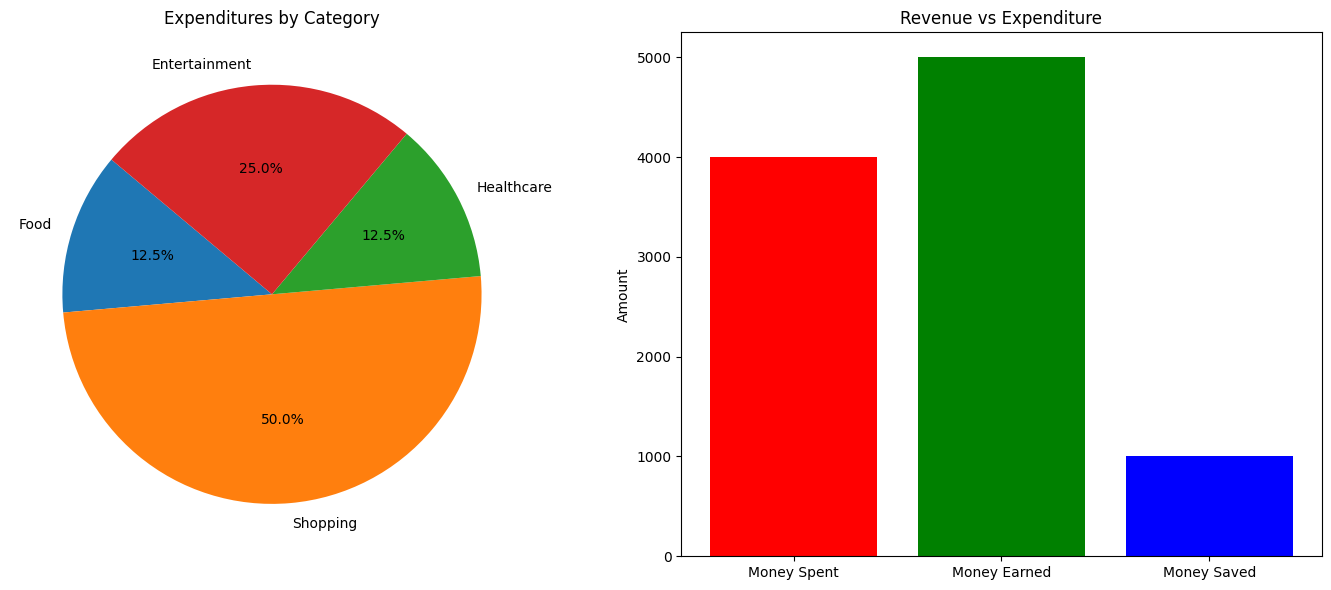

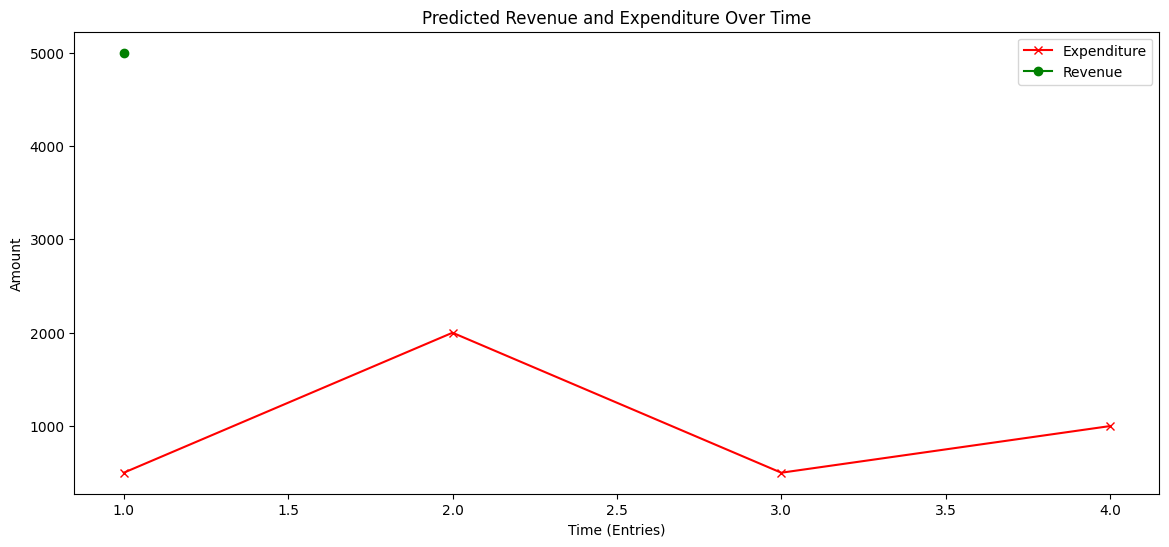

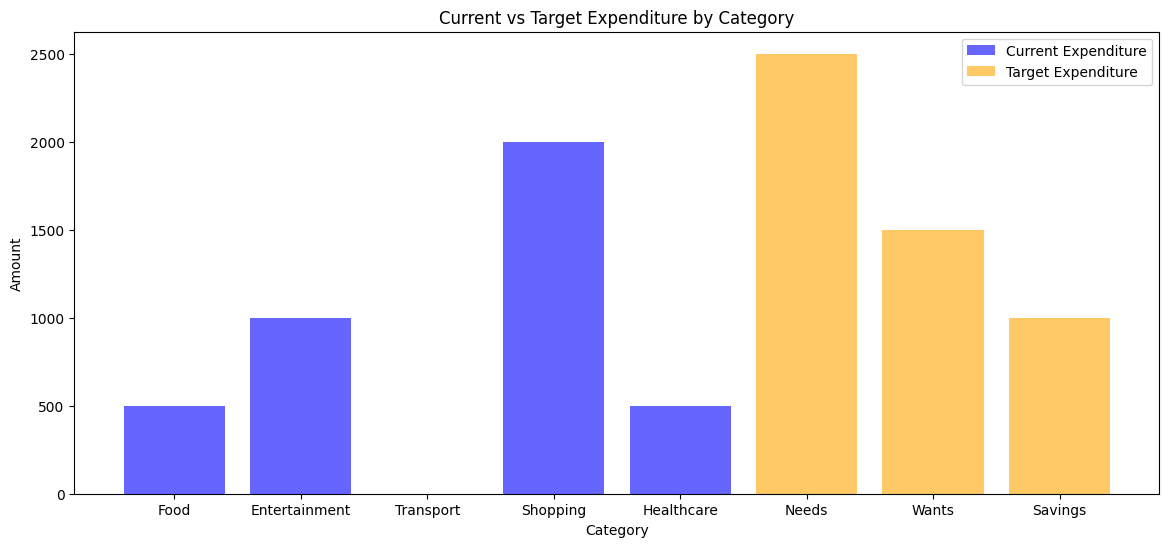

In [11]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

# Simulated basic database (in-memory dictionary for users)
user_data = {}
expenditure_categories = ["Food", "Entertainment", "Transport", "Shopping", "Healthcare"]
income_sources = ['Salary', 'Other Income Source']
logged_in_user = None
expenditures = []
revenues = []

def clear_frame():
    for widget in root.winfo_children():
        widget.destroy()

def create_account_screen():
    clear_frame()
    tk.Label(root, text="Create an Account", font=("Arial", 14)).pack(pady=10)

    tk.Label(root, text="Name").pack()
    name_entry = tk.Entry(root)
    name_entry.pack()

    tk.Label(root, text="Phone Number").pack()
    phone_entry = tk.Entry(root)
    phone_entry.pack()

    tk.Label(root, text="Username").pack()
    username_entry = tk.Entry(root)
    username_entry.pack()

    tk.Label(root, text="Password").pack()
    password_entry = tk.Entry(root, show="*")
    password_entry.pack()

    def save_account():
        name = name_entry.get()
        phone = phone_entry.get()
        username = username_entry.get()
        password = password_entry.get()

        if username in user_data:
            tk.Label(root, text="Username already exists!", fg="red").pack()
        else:
            user_data[username] = {"name": name, "phone": phone, "password": password}
            tk.Label(root, text="Account created successfully!", fg="green").pack()
            show_main_screen()

    ttk.Button(root, text="Create Account", command=save_account).pack(pady=10)

def login_screen():
    clear_frame()
    tk.Label(root, text="Log In", font=("Arial", 14)).pack(pady=10)

    tk.Label(root, text="Username").pack()
    username_entry = tk.Entry(root)
    username_entry.pack()

    tk.Label(root, text="Password").pack()
    password_entry = tk.Entry(root, show="*")
    password_entry.pack()

    def verify_login():
        global logged_in_user
        username = username_entry.get()
        password = password_entry.get()

        if username in user_data and user_data[username]["password"] == password:
            logged_in_user = username
            dashboard()
        else:
            tk.Label(root, text="Invalid credentials, please try again.", fg="red").pack()

    ttk.Button(root, text="Log In", command=verify_login).pack(pady=10)

def add_expenditure_screen():
    exp_window = tk.Toplevel(root)
    exp_window.title("Add Expenditure")

    tk.Label(exp_window, text="Enter Amount:").pack()
    amount_entry = tk.Entry(exp_window)
    amount_entry.pack()

    tk.Label(exp_window, text="Select Category:").pack()
    category_var = tk.StringVar(exp_window)
    category_var.set(expenditure_categories[0])
    category_dropdown = tk.OptionMenu(exp_window, category_var, *expenditure_categories)
    category_dropdown.pack()

    def save_expenditure():
        amount = amount_entry.get()
        category = category_var.get()
        if amount:
            expenditures.append((float(amount), category))
            messagebox.showinfo("Success", "Expenditure added successfully!")
            exp_window.destroy()
        else:
            messagebox.showerror("Error", "Please enter a valid amount.")

    tk.Button(exp_window, text="Save", command=save_expenditure).pack()

def add_revenue_screen():
    revenue_window = tk.Toplevel(root)
    revenue_window.title("Add Revenue")

    def add_salary():
        salary_window = tk.Toplevel(revenue_window)
        salary_window.title("Add Salary")
        tk.Label(salary_window, text="Enter Salary Amount:").pack()
        salary_amount_entry = tk.Entry(salary_window)
        salary_amount_entry.pack()

        def save_salary():
            salary_amount = salary_amount_entry.get()
            if salary_amount:
                revenues.append((float(salary_amount), "Salary"))
                messagebox.showinfo("Success", "Salary added successfully!")
                salary_window.destroy()
            else:
                messagebox.showerror("Error", "Please enter a valid amount.")

        tk.Button(salary_window, text="Save", command=save_salary).pack()

    def other_income_source():
        other_income_window = tk.Toplevel(revenue_window)
        other_income_window.title("Add Other Income Source")
        tk.Label(other_income_window, text="Enter Income Amount:").pack()
        income_amount_entry = tk.Entry(other_income_window)
        income_amount_entry.pack()

        def save_other_income():
            income_amount = income_amount_entry.get()
            if income_amount:
                revenues.append((float(income_amount), "Other Income"))
                messagebox.showinfo("Success", "Income added successfully!")
                other_income_window.destroy()
            else:
                messagebox.showerror("Error", "Please enter a valid amount.")

        tk.Button(other_income_window, text="Save", command=save_other_income).pack()

    tk.Button(revenue_window, text="Add Salary", command=add_salary).pack()
    tk.Button(revenue_window, text="Other Income Source", command=other_income_source).pack()

def financial_analysis():
    if not expenditures and not revenues:
        messagebox.showinfo("No Data", "No expenditures or revenues to display.")
        return

    exp_amounts = [exp[0] for exp in expenditures]
    exp_categories = [exp[1] for exp in expenditures]
    rev_amounts = [rev[0] for rev in revenues]

    # Expenditure by Category Pie Chart
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.pie(exp_amounts, labels=exp_categories, autopct='%1.1f%%', startangle=140)
    plt.title("Expenditures by Category")

    # Revenue vs Expenditure Bar Chart
    total_expenditure = sum(exp_amounts)
    total_revenue = sum(rev_amounts)
    money_saved = total_revenue - total_expenditure
    plt.subplot(1, 2, 2)
    plt.bar(["Money Spent", "Money Earned", "Money Saved"], [total_expenditure, total_revenue, money_saved], color=['red', 'green', 'blue'])
    plt.title("Revenue vs Expenditure")
    plt.ylabel("Amount")
    plt.tight_layout()
    plt.show()


def get_recommendations():
    if not revenues:
        messagebox.showinfo("No Data", "No revenue data available for recommendations.")
        return

    # 50/30/20 Rule for Revenue Allocation
    salary = sum(rev[0] for rev in revenues if rev[1] == "Salary")
    needs_amount = 0.5 * salary
    wants_amount = 0.3 * salary
    savings_amount = 0.2 * salary

    # Display Recommendations
    messagebox.showinfo("Recommendations",
                        f"Suggested Revenue Allocation (50/30/20 Rule):\n"
                        f"Needs (50%): ${needs_amount:.2f}\n"
                        f"Wants (30%): ${wants_amount:.2f}\n"
                        f"Savings (20%): ${savings_amount:.2f}")

    # Identify the highest expenditure category
    highest_category = max(expenditures, key=lambda x: x[0])[1]
    messagebox.showinfo("Highest Expenditure", f"Highest expenditure is in category: {highest_category}")

    # Prepare data for line chart of Revenue and Expenditure
    exp_values = [exp[0] for exp in expenditures]
    rev_values = [rev[0] for rev in revenues]
    time_points_exp = list(range(1, len(exp_values) + 1))
    time_points_rev = list(range(1, len(rev_values) + 1))

    # Plot the line chart
    plt.figure(figsize=(14, 6))
    if exp_values:
        plt.plot(time_points_exp, exp_values, marker='x', color='red', label="Expenditure")
    if rev_values:
        plt.plot(time_points_rev, rev_values, marker='o', color='green', label="Revenue")

    plt.title("Predicted Revenue and Expenditure Over Time")
    plt.xlabel("Time (Entries)")
    plt.ylabel("Amount")
    plt.legend()
    plt.show()

    # Expenditure by Category vs Target Expenditure (Needs vs Wants)
    exp_totals = {cat: sum(exp[0] for exp in expenditures if exp[1] == cat) for cat in expenditure_categories}
    target_totals = {
        "Needs": needs_amount,
        "Wants": wants_amount,
        "Savings": savings_amount
    }

    plt.figure(figsize=(14, 6))
    plt.bar(exp_totals.keys(), exp_totals.values(), color='blue', alpha=0.6, label="Current Expenditure")
    plt.bar(target_totals.keys(), target_totals.values(), color='orange', alpha=0.6, label="Target Expenditure")
    plt.title("Current vs Target Expenditure by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount")
    plt.legend()
    plt.show()

        
def dashboard():
    clear_frame()
    tk.Label(root, text=f"Welcome, {user_data[logged_in_user]['name']}", font=("Arial", 14)).pack(pady=10)

    tk.Button(root, text="Add Expenditure", command=add_expenditure_screen).pack(pady=5)
    tk.Button(root, text="Add Revenue", command=add_revenue_screen).pack(pady=5)
    tk.Button(root, text="Financial Analysis", command=financial_analysis).pack(pady=5)
    tk.Button(root, text="Get Recommendations", command=get_recommendations).pack(pady=5)

def show_main_screen():
    clear_frame()
    tk.Label(root, text="Welcome to Personal Finance Manager", font=("Arial", 16)).pack(pady=20)
    tk.Button(root, text="Create Account", command=create_account_screen).pack(pady=5)
    tk.Button(root, text="Log In", command=login_screen).pack(pady=5)

root = tk.Tk()
root.title("Personal Finance Manager")
root.geometry("500x600")

show_main_screen()

root.mainloop()